In [1]:
# Import libraries necessary for this project
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import numpy as np

from sklearn.model_selection import train_test_split as tts

%matplotlib inline

In [2]:
data = pd.read_csv('D:\ml\india_house_data.csv')
price = data['price']

data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
data.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
data.shape

(21613, 21)

In [6]:
# Minimum price of the data
minimum_price = np.amin(price)

# Maximum price of the data
maximum_price = np.amax(price)

# Mean price of the data
mean_price = np.mean(price)

# Median price of the data
median_price = np.median(price)

# Standard deviation of prices of the data
std_price = np.std(price)

# Show the calculated statistics
print("Statistics for housing dataset:\n")
print("Minimum price: rs {}".format(minimum_price)) 
print("Maximum price: rs {}".format(maximum_price))
print("Mean price: rs {}".format(mean_price))
print("Median price rs {}".format(median_price))
print("Standard deviation of prices: rs {}".format(std_price))

Statistics for housing dataset:

Minimum price: rs 75000.0
Maximum price: rs 7700000.0
Mean price: rs 540088.1417665294
Median price rs 450000.0
Standard deviation of prices: rs 367118.7031813722


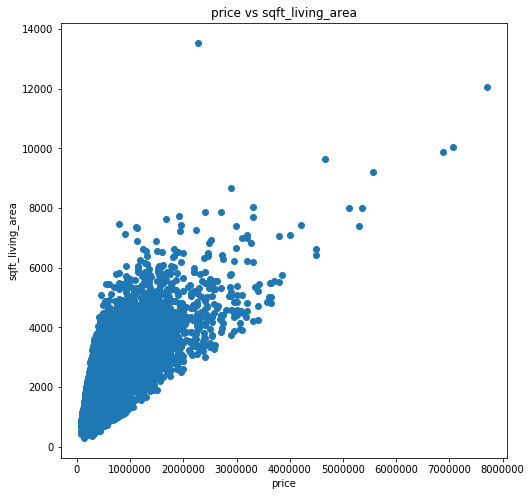

In [7]:
plt.figure(figsize=(8,8 ))
plt.scatter(x=data['price'],y=data['sqft_living'])
plt.title('price vs sqft_living_area')
plt.xlabel('price')
plt.ylabel('sqft_living_area')
plt.show()

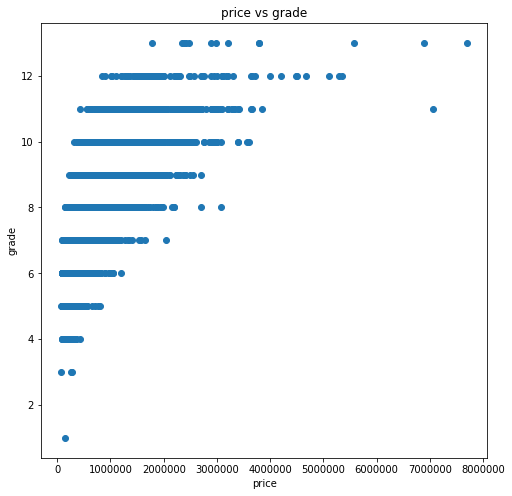

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(x=data['price'],y=data['grade'])
plt.title('price vs grade')
plt.xlabel('price')
plt.ylabel('grade')
plt.show()

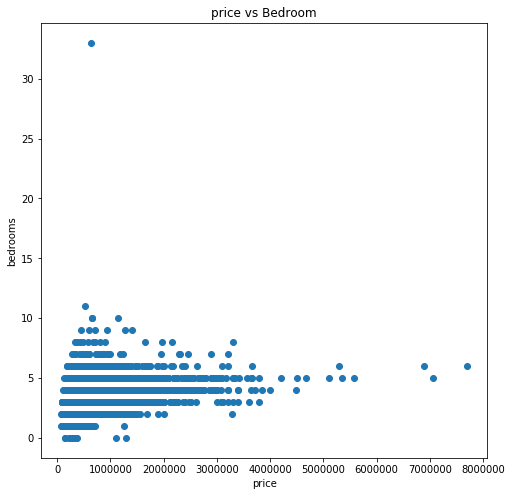

In [9]:
plt.figure(figsize=(8,8 ))
plt.scatter(x=data['price'],y=data['bedrooms'])
plt.title('price vs Bedroom')
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.show()

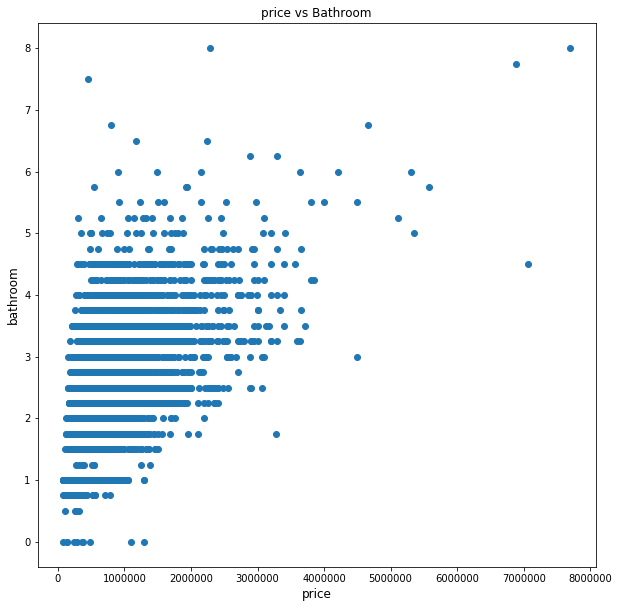

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(x=data['price'],y=data['bathrooms'])
plt.title('price vs Bathroom')
plt.ylabel('bathroom',fontsize=12)
plt.xlabel('price',fontsize=12)
plt.show()

In [11]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
#features are
fet=[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long']

x_fet=data[fet]
y_tar=data['price']

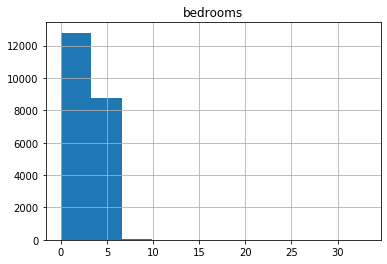

In [13]:
plt.title("bedrooms")
data['bedrooms'].hist()


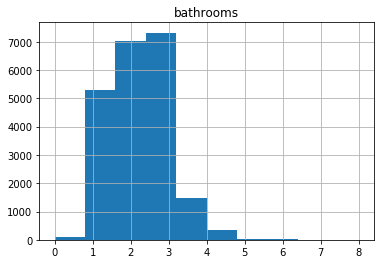

In [14]:
plt.title("bathrooms")
data['bathrooms'].hist()


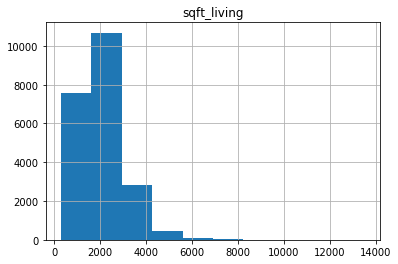

In [15]:
plt.title("sqft_living")
data['sqft_living'].hist()


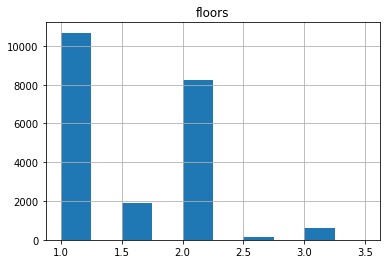

In [16]:
plt.title("floors")
data['floors'].hist()


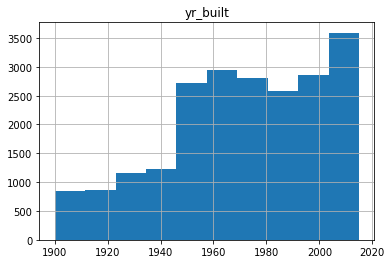

In [17]:
plt.title("yr_built")
data['yr_built'].hist()


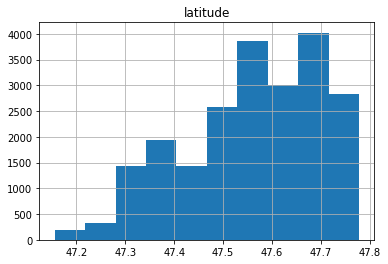

In [18]:
plt.title("latitude")
data['lat'].hist()

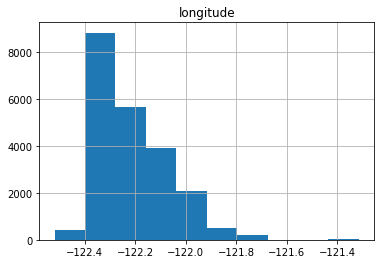

In [19]:
plt.title("longitude")
data['long'].hist()

In [20]:
X_train, X_test, Y_train, Y_test = tts(x_fet, y_tar, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(17290, 15)
(4323, 15)
(17290,)
(4323,)


In [22]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 2) 
X_train_poly = poly.fit_transform(X_train) 


In [23]:
#training the model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
  # predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

In [25]:
 # predicting on test data-set
y_test_predict = poly_model.predict(poly.fit_transform(X_test))

In [26]:
#finding accuracy of the pridicted model
Accuracy = r2_score(Y_test, y_test_predict)
print("Accuracy is {} %".format(int(Accuracy*100)))

Accuracy is 77 %
